In [3]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD

In [4]:
u = mda.Universe(PSF, DCD)
print(u)
print(len(u.trajectory))

<Universe with 3341 atoms>
98


In [5]:
last_five = u.atoms[-5:]
print(last_five)

<AtomGroup [<Atom 3337: HA1 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3338: HA2 of type 6 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


In [6]:
print(u.residues)

<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, ..., <Residue ILE, 212>, <Residue LEU, 213>, <Residue GLY, 214>]>


In [7]:
print(u.residues[50:100].n_residues)

50


In [8]:
print(u.atoms[:20].names)

['N' 'HT1' 'HT2' 'HT3' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG' 'HG1' 'HG2' 'SD'
 'CE' 'HE1' 'HE2' 'HE3' 'C' 'O' 'N']


In [9]:
print(u.atoms[:20].residues)

<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>]>


In [10]:
print(u.atoms[:20].segments)

<SegmentGroup [<Segment 4AKE>]>


In [12]:
print(u.atoms[:20].names)

['N' 'HT1' 'HT2' 'HT3' 'CA' 'HA' 'CB' 'HB1' 'HB2' 'CG' 'HG1' 'HG2' 'SD'
 'CE' 'HE1' 'HE2' 'HE3' 'C' 'O' 'N']


In [13]:
print(list(zip(u.atoms[50:70].names, u.atoms[50:70].masses)))

[('HG21', 1.008), ('HG22', 1.008), ('HG23', 1.008), ('CG1', 12.011), ('HG11', 1.008), ('HG12', 1.008), ('CD', 12.011), ('HD1', 1.008), ('HD2', 1.008), ('HD3', 1.008), ('C', 12.011), ('O', 15.999), ('N', 14.007), ('HN', 1.008), ('CA', 12.011), ('HA', 1.008), ('CB', 12.011), ('HB', 1.008), ('CG2', 12.011), ('HG21', 1.008)]


In [15]:
print(u.atoms[:20].residues)

<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>]>


In [16]:
print(u.atoms[-20:].segments)

<SegmentGroup [<Segment 4AKE>]>


In [17]:
print(u.atoms[-20:].resnames)

['LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU' 'LEU'
 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY' 'GLY']


In [19]:
near_met = u.select_atoms("not resname MET and (around 2 resname MET)")
near_met.groupby(["resnames", "names"])

{('ASP', 'N'): <AtomGroup with 1 atom>,
 ('ASP', 'C'): <AtomGroup with 1 atom>,
 ('LEU', 'N'): <AtomGroup with 1 atom>,
 ('THR', 'N'): <AtomGroup with 1 atom>,
 ('ASN', 'O'): <AtomGroup with 1 atom>,
 ('ILE', 'C'): <AtomGroup with 2 atoms>,
 ('GLU', 'N'): <AtomGroup with 1 atom>,
 ('GLN', 'C'): <AtomGroup with 1 atom>,
 ('ALA', 'HN'): <AtomGroup with 2 atoms>,
 ('ALA', 'C'): <AtomGroup with 1 atom>,
 ('LYS', 'N'): <AtomGroup with 1 atom>,
 ('ARG', 'N'): <AtomGroup with 1 atom>}

In [20]:
ca = u.select_atoms("resid 1-5 and name CA")
print(ca.positions)
print(ca.positions.shape)

[[11.664622    8.393473   -8.983231  ]
 [11.414839    5.4344215  -6.5134845 ]
 [ 8.959755    5.612923   -3.6132305 ]
 [ 8.290068    3.075991   -0.79665166]
 [ 5.011126    3.7638984   1.130355  ]]
(5, 3)


In [22]:
print(ca.center_of_mass())

[ 9.06808195  5.25614133 -3.75524844]


In [23]:
nhh = u.atoms[:3]
print(nhh.names)

['N' 'HT1' 'HT2']


In [26]:
angle_nhh = nhh.angle
print(angle_nhh.value())

37.99234750892497


In [28]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame {:3d}, Time {:4.0f} ps, Rgyr {:.4f} Å".format(ts.frame, time, rgyr))

Frame   0, Time    1 ps, Rgyr 16.6690 Å
Frame   1, Time    2 ps, Rgyr 16.6732 Å
Frame   2, Time    3 ps, Rgyr 16.7315 Å
Frame   3, Time    4 ps, Rgyr 16.7223 Å
Frame   4, Time    5 ps, Rgyr 16.7440 Å
Frame   5, Time    6 ps, Rgyr 16.7185 Å
Frame   6, Time    7 ps, Rgyr 16.7741 Å
Frame   7, Time    8 ps, Rgyr 16.7764 Å
Frame   8, Time    9 ps, Rgyr 16.7894 Å
Frame   9, Time   10 ps, Rgyr 16.8289 Å
Frame  10, Time   11 ps, Rgyr 16.8521 Å
Frame  11, Time   12 ps, Rgyr 16.8549 Å
Frame  12, Time   13 ps, Rgyr 16.8723 Å
Frame  13, Time   14 ps, Rgyr 16.9108 Å
Frame  14, Time   15 ps, Rgyr 16.9494 Å
Frame  15, Time   16 ps, Rgyr 16.9810 Å
Frame  16, Time   17 ps, Rgyr 17.0033 Å
Frame  17, Time   18 ps, Rgyr 17.0196 Å
Frame  18, Time   19 ps, Rgyr 17.0784 Å
Frame  19, Time   20 ps, Rgyr 17.1265 Å


In [32]:
rgyr = []
time = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(protein.radius_of_gyration())

In [33]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=["Radius of gyration (Å)"], index=time)
rgyr_df.index.name = "Time (ps)"
rgyr_df.head()

,Radius of gyration (Å)
Time (ps),
1.0,16.669018
2.0,16.673217
3.0,16.731454
4.0,16.722283
5.0,16.743961


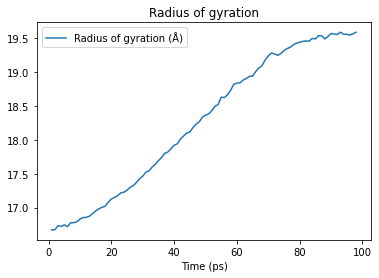

In [34]:
%matplotlib inline
rgyr_df.plot(title="Radius of gyration")

In [36]:
ca = u.select_atoms("name CA")
with mda.Writer("calphas.xtc", ca.n_atoms) as w:
    for ts in u.trajectory:
        w.write(ca)

In [38]:
from MDAnalysis.analysis import rms

In [40]:
bb = u.select_atoms("backbone")

u.trajectory[0]
first = bb.positions

u.trajectory[-1]
last = bb.positions

rms.rmsd(first, last)

6.852774844656239

In [41]:
u.trajectory[0]
rmsd_analysis = rms.RMSD(u, select="backbone", groupselections=["name CA", "protein"])
rmsd_analysis.run()

In [42]:
print(rmsd_analysis.rmsd.shape)

(98, 5)


In [43]:
import pandas as pd
rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:], columns=["Backbone", "C-alphas", "Protein"], index=rmsd_analysis.rmsd[:, 1])
rmsd_df.index.name = "Time (ps)"
rmsd_df.head()

,Backbone,C-alphas,Protein
Time (ps),,,
1.0,6.391203e-07,4.263638e-08,5.443850e-08
2.0,4.636592e-01,4.235205e-01,6.934167e-01
3.0,6.419340e-01,5.939111e-01,8.748416e-01
4.0,7.743983e-01,7.371346e-01,1.052780e+00
5.0,8.588600e-01,8.279498e-01,1.154986e+00


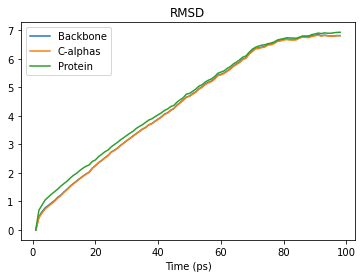

In [44]:
rmsd_df.plot(title="RMSD")